# 범주형 데이터 {#ch:cat}

## 목차 {#sec:toc-cat}

* 들어가기 문제

* 핵심 요약 
    * 파이썬에서 범주형 데이터
    * 명목형데이터와 순위형 데이터
    * 범주형(`pd.Categorical`) 생성/확인/변환
    * 범주형 데이터의 중요성
    * 범주형 데이터 전처리
    * 범주형 데이터 다루기
    
* 세부내용 - 저자가 제공하는 함수
    * 범주형 데이터 합치기
    * 범주형 데이터의 순위 부분수정하기
    
* 들어가기 문제 답안

## 들어가기 문제 {#sec:cat-prob-intro}

|영화 | 장르| 등급 |
|:---|:---|:---|
|Die Hard| Action|R |
|Shawshank Redemption| Drama |R |
|Seven | Thriller |R|
|Gone Girl | Thriller |R|
|The Italian Job | Crime |PG-13|
|Scarface | Crime |R|

|영화 | 장르| 등급 |
|:---|:---|:---|
|Toy Story | Animation |G|
|The Lion King | Animation |G|
|When Harry Met Sally| Comedy |R|
|Groundhog Day| Comedy |PG|


* MPA film rating system in the US
  - G(General Audiences)
  - PG(Parental Guidance Suggested)
  - PG-13(Parents Strongly Cautioned)
  - R(Restricted)
  - NC-17(No Child 17 and under admitted)

In [1]:
import numpy as np
import pandas as pd

df_mov1 = pd.read_csv("data/movies1.csv",
                      dtype = 
                      {"genre": pd.api.types.CategoricalDtype(
                          ['Action', 'Crime', 'Drama', 'Thriller']),
                       "rating": pd.api.types.CategoricalDtype(
                          ['PG', 'G', 'PG-13', 'R', 'NC-13'],
                                   ordered = True)})

In [2]:
df_mov2 = pd.read_csv("data/movies2.csv",
                      dtype = 
                      {"genre": "category",
                       "rating": pd.api.types.CategoricalDtype(
                          ['PG', 'G', 'PG-13', 'R', 'NC-13'],
                                   ordered = True)})

In [3]:
df_mov1

,name,genre,rating
0,Die Hard,Action,R
1,Shawshank Redemption,Drama,R
2,Seven,Thriller,R
3,Gone Girl,Thriller,R
4,The Italian Job,Crime,PG-13
5,Scarface,Crime,R


In [4]:
df_mov2

,name,genre,rating
0,Toy Story,Animation,G
1,The Lion King,Animation,G
2,When Harry Met Sally,Comedy,R
3,Groundhog Day,Comedy,PG


위의 데이터에서 영화 장르는 크게 `Action`,  `Drama`,  `Thriller`, `Crime`로 나눌 수 있고, 
영화 등급은 크게 `PG`<`G`<`PG-13`<`R`<`NC-13`로 나눌 수 있다. 다음을 쉽게 풀 수 있다면 

1. 순서를 알파벳 순인 `Action`, `Crime`, `Drama`, `Thriller`로 바꾼다
1. `Animation`, `Comedy` 추가
1. `Crime`는 `Thriller`에 포함시킨다
1. `Romance`추가
1. `Comedy`와 `Romance`는 `Drama`에 포함시킨다
1. 약어로 표시한다 : `Act`, `Dra`, `Thr`, `Ani`
1. 등급을 `PG`<`G`<`PG-13`<`R`<`NC-13`순의 순위형으로 변환한다
1. 등급을 `G`<`PG`로 바꾼다.
1. 등급에 `NC-17` 추가한다
1. 새로운 장르 `experimental`를 추가한다
1. 새로운 장르 `experimental`을 `Exp`로 바꾼다.

### 해답 및 찾아가기

* 순서를 알파벳 순인 `Action`, `Crime`, `Drama`, `Thriller`로 바꾼다(-> 범주형 데이터 - 범주형 데이터에 대한 전처리 - 범주 순서 바꾸기)

In [5]:
# 알파벳 순을 직접 작성하거나
df_mov1['genre'].cat.reorder_categories(['Action', 'Crime', 'Drama', 'Thriller'])

0      Action
1       Drama
2    Thriller
3    Thriller
4       Crime
5       Crime
Name: genre, dtype: category
Categories (4, object): ['Action', 'Crime', 'Drama', 'Thriller']

In [6]:
# .sort_values()로 정렬을 할 수도 있다: 이 방법은 임의의 범주형 데이터에 대해 알파벳 순으로 범주 순서를 바꾼다
genre2 = df_mov1['genre'].cat.reorder_categories(df_mov1['genre'].cat.categories.sort_values())
genre2

0      Action
1       Drama
2    Thriller
3    Thriller
4       Crime
5       Crime
Name: genre, dtype: category
Categories (4, object): ['Action', 'Crime', 'Drama', 'Thriller']

* `Animation`, `Comedy` 추가

In [7]:
# genre2 = df_mov1['genre']
genre3 = genre2.cat.add_categories(['Animation', 'Comedy'])
genre3
# .set_categories() 메소드를 활용한다면 다음과 같이 할 수 있을 것이다
# genre3 = genre2.cat.set_categories(genre2.cat.categories.tolist() + ['Animation', 'Comedy'])

0      Action
1       Drama
2    Thriller
3    Thriller
4       Crime
5       Crime
Name: genre, dtype: category
Categories (6, object): ['Action', 'Crime', 'Drama', 'Thriller', 'Animation', 'Comedy']

* `Crime`는 `Thriller`에 포함시킨다

In [9]:
# from mypack.utils import cat_combine

genre4 = genre3.replace("Crime", "Thriller")
# cat_combine(genre3, ['Thriller'], 'Crime')
genre4

0      Action
1       Drama
2    Thriller
3    Thriller
4    Thriller
5    Thriller
Name: genre, dtype: category
Categories (5, object): ['Action', 'Drama', 'Thriller', 'Animation', 'Comedy']

* `Romance`추가

In [10]:
genre5 = genre4.cat.add_categories('Romance')
genre5

0      Action
1       Drama
2    Thriller
3    Thriller
4    Thriller
5    Thriller
Name: genre, dtype: category
Categories (6, object): ['Action', 'Drama', 'Thriller', 'Animation', 'Comedy', 'Romance']

* `Comedy`와 `Romance`는 `Drama`에 포함시킨다

In [11]:
genre6 = genre5.replace(['Comedy', 'Romance'], 'Drama')
#genre6 = cat_combine(genre5, ['Comedy', 'Romance'], 'Drama')
genre6

0      Action
1       Drama
2    Thriller
3    Thriller
4    Thriller
5    Thriller
Name: genre, dtype: category
Categories (4, object): ['Action', 'Drama', 'Thriller', 'Animation']

* 약어로 표시한다 : `Act`, `Dra`, `Thr`, `Ani`, `Cri`, `Com`, `Rom`

In [12]:
genre6 = genre5.cat.rename_categories(
    {'Action':'Act', 'Drama':'Dra', 'Thriller':'Thr', 'Animation':'Ani', 
     'Crime':'Cri', 'Comedy':'Com', 'Romance':'Rom'})
genre6

0    Act
1    Dra
2    Thr
3    Thr
4    Thr
5    Thr
Name: genre, dtype: category
Categories (6, object): ['Act', 'Dra', 'Thr', 'Ani', 'Com', 'Rom']

전체 카테고리 순서에 맞춰 새로운 이름을 리스트로 `rename_categories()`에 전달할 수도 있다.

In [13]:
genre5.cat.categories

Index(['Action', 'Drama', 'Thriller', 'Animation', 'Comedy', 'Romance'], dtype='object')

In [14]:
genre6 = genre5.cat.rename_categories(['Act', 'Ani', 'Com', 'Cri', 'Dra', 'Rom'])
genre6

0    Act
1    Ani
2    Com
3    Com
4    Com
5    Com
Name: genre, dtype: category
Categories (6, object): ['Act', 'Ani', 'Com', 'Cri', 'Dra', 'Rom']

참고로 다음과 같이 기존 이름과 새로운 이름의 딕셔너리는 다음과 같이 만들 수 있다(딕셔너리 컴프리헨션).

In [15]:
{gen_old:gen_new for gen_old, gen_new in zip(genre5.cat.categories, ['Act', 'Ani', 'Com', 'Cri', 'Dra', 'Rom'])}

{'Action': 'Act',
 'Drama': 'Ani',
 'Thriller': 'Com',
 'Animation': 'Cri',
 'Comedy': 'Dra',
 'Romance': 'Rom'}

* 등급을 `PG`<`G`<`PG-13`<`R`<`NC-13`순의 순위형으로 변환한다

In [16]:
rating = df_mov1['rating'].cat.as_ordered().cat.set_categories(['PG', 'G', 'PG-13', 'R', 'NC-13'])
rating

0        R
1        R
2        R
3        R
4    PG-13
5        R
Name: rating, dtype: category
Categories (5, object): ['PG' < 'G' < 'PG-13' < 'R' < 'NC-13']

* 등급을 `G`<`PG`로 바꾼다.

In [19]:
# from mypack.utils import reorder_cat_partial

def reorder_cat_partial(x, orders_new):
    if isinstance(x, pd.Series):
        cat_remains = ~(x.cat.categories.isin(orders_new))
        cat_new = x.cat.categories.values.copy()
        cat_new[~cat_remains] = orders_new
        return x.cat.reorder_categories(cat_new)
    elif isinstance(x, pd.Categorical):
        cat_remains = ~(x.categories.isin(orders_new))
        cat_new = x.categories.values.copy()
        cat_new[~cat_remains] = orders_new
        return x.reorder_categories(cat_new)

In [20]:
rating2 = reorder_cat_partial(rating, ['G', 'PG'])
rating2

0        R
1        R
2        R
3        R
4    PG-13
5        R
Name: rating, dtype: category
Categories (5, object): ['G' < 'PG' < 'PG-13' < 'R' < 'NC-13']

* 등급에 `NC-17` 추가한다

In [21]:
rating2.cat.add_categories('NC-17')

0        R
1        R
2        R
3        R
4    PG-13
5        R
Name: rating, dtype: category
Categories (6, object): ['G' < 'PG' < 'PG-13' < 'R' < 'NC-13' < 'NC-17']

* 새로운 장르 `experimental`를 추가한다

In [22]:
genre7 = genre6.cat.add_categories('experimental')
genre7

0    Act
1    Ani
2    Com
3    Com
4    Com
5    Com
Name: genre, dtype: category
Categories (7, object): ['Act', 'Ani', 'Com', 'Cri', 'Dra', 'Rom', 'experimental']

* 새로운 장르 `experimental`을 `Exp`로 바꾼다.

In [23]:
genre8 = genre7.cat.rename_categories({'experimental':'Exp'})
genre8

0    Act
1    Ani
2    Com
3    Com
4    Com
5    Com
Name: genre, dtype: category
Categories (7, object): ['Act', 'Ani', 'Com', 'Cri', 'Dra', 'Rom', 'Exp']

## 범주형 데이터 개괄: 명목형 데이터와 순위형 데이터

범주형 데이터란 관찰 가능한 값이 한정되어 있는 데이터이다. 예를 들어 어떤 모임의 구성원 주소를 생각해보자. 주소 중에서 광역시을 생각하면 관찰할 수 있는 값은 2023년 현재 부산, 인천, 대구, 대전, 광주, 울산뿐이다. 

범주형 데이터는 크게 **명목형**과 **순위형**이 있다. 명목형은 서로 독립된 범주형이고, 순위형은 범주 사이에 순위 관계가 존재하는 경우이다. 명목형의 예로 서울, 부산, 대구 등과 같이 대소, 우열이 없는 경우이다.[^07seoul] 그와 반대로 리커트 응답 항목의 "매우 그렇지 **않다**", "그렇다", "매우 그렇다" 등은 단어의미가 어떤 명제에 대해 긍정의 정도를 의미한다. 긍정의 강도에서 "매우 그렇지 **않다**" < "그렇다" < "매우 그렇다"임을 누구나 알 수 있다. 하지만 각 범주 사이의 크기를 정확하게 결정할 수는 없다 "매우 그렇지 **않다**", "그렇다", "매우 그렇다"를 0,1,2로 코딩할 수 있지만, 이 코딩값의 의미가 "그렇다"와 "매우 그렇지 않다"의 차이가 1이고, "매우 그렇다"와 "그렇다"의 차이가 정확하게 1이라는 것을 의미하지 않는다. **순위형**은 이렇게 대소는 분명하지만, 차이의 정도에 대해서는 누구도 알 수 없는 경우이다. 앞에서 사람이 "매우 그렇다", "그렇다", "그렇지 않다"라고 대답하는 경우에 "매우 그렇다"와 "그렇다", 그리고 "그렇다"와 "그렇지 않다"의 차이가 정확히 같다고 말하기 힘들다. 

[^07seoul]: 도시의 크기를 생각하면 서울은 부산보다 크지만 이것이 서울과 부산의 본질적인 의미에 담겨 있지 않다. 서울의 크기는 항상 부산보다 큰가? 미래에도 서울이 부산보다 항상 클 것인가?

#### 범주형 배열

범주형 데이터를 생성하는 방법은 다음과 같다. 먼저 명목형 데이터를 생성하는 방법이다.

In [24]:
x = pd.Categorical(['세종', '서울', '부산', '부산', '세종', '서울', '서울'])
x

['세종', '서울', '부산', '부산', '세종', '서울', '서울']
Categories (3, object): ['부산', '서울', '세종']

In [25]:
type(x)

pandas.core.arrays.categorical.Categorical

이렇게 생성된 범주형 배열[^cat_array]은 속성 `.categories`, `.ordered`, `.codes`로 가능한 범주, 범주형의 일종인 순위형인지, 그리고 내부에 값이 어떻게 저장되는지를 확인할 수 있다.

[^cat_array]: `type()`의 결과 pandas.core.**arrays**.categorical.Categorical로 출력되므로 범주형 배열이라고 부르겠다.

In [26]:
x.categories, x.ordered, x.codes

(Index(['부산', '서울', '세종'], dtype='object'),
 False,
 array([2, 1, 0, 0, 2, 1, 1], dtype=int8))

순위형 배열은 다음과 같이 만들 수 있다. 순위형에서는 자료에서 범주의 순위를 확인하기 힘들기 때문에 범주의 순위대로 `categories=`를 설정하고, `ordered=True`로 지정한다. 

In [27]:
y = pd.Categorical(['매우 그렇다', '그렇다', '그렇지 않다', '그렇지 않다', '그렇다'],
                  categories=['그렇지 않다', '그렇다', '매우 그렇다'],
                  ordered = True)
y

['매우 그렇다', '그렇다', '그렇지 않다', '그렇지 않다', '그렇다']
Categories (3, object): ['그렇지 않다' < '그렇다' < '매우 그렇다']

In [28]:
y.categories, y.ordered, y.codes

(Index(['그렇지 않다', '그렇다', '매우 그렇다'], dtype='object'),
 True,
 array([2, 1, 0, 0, 1], dtype=int8))

순위형에서는 자료 사이의 대소를 확인할 수 있고, 대소를 통해 계산할 수 있는 메쏘드(`.min()`, `.max()`)를 지원한다.

In [29]:
y.min(), y.max()

('그렇지 않다', '매우 그렇다')

반면 명목형 배열에는 `.min()` 또는 `.max()`를 쓸 수 없다.

In [30]:
#% eval=FALSE
try:
    x.min(), x.max()
except Exception as e:
    print(e)
## TypeError: Categorical is not ordered for operation min
## you can use .as_ordered() to change the Categorical to an ordered one

Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one



만약 명목형 자료를 순위형으로 변환하고자 한다면, `.as_ordered()` 메쏘드를 사용할 수 있다.

In [31]:
x.as_ordered()

['세종', '서울', '부산', '부산', '세종', '서울', '서울']
Categories (3, object): ['부산' < '서울' < '세종']

이때 범주 순위를 결정하기 위해서는 `.reorder_categories()`를 사용할 필요가 있다.

In [32]:
x = x.as_ordered().reorder_categories(['부산', '세종', '서울'])
x

['세종', '서울', '부산', '부산', '세종', '서울', '서울']
Categories (3, object): ['부산' < '세종' < '서울']

만약 순위형을 범주형으로 변환하고자 한다면 `.as_unordered()`를 사용한다.

In [33]:
x.as_unordered()

['세종', '서울', '부산', '부산', '세종', '서울', '서울']
Categories (3, object): ['부산', '세종', '서울']

##### 명목(Nominal)형 배열와 순위(Ordinal)형 배열의 생성/확인/변환

변수가 `x`일 때, 

|         | 명목형(Nominal)  | 순위형(Ordinal)  |
|:---|:---------|:---------|
|  생성    | `pd.Categorical([...], categories=[...])`| `pd.Categorical([...], categories=[...], ordered=True)` |
|  확인    | `isinstance(x, pd.Categorical) and not x.ordered`    | `isinstance(x, pd.Categorical) and x.ordered` |
|  변환(~으로)    | `x.as_unordered()` | `x.as_ordered().reorder_categories([...])`|

### 범주형 시리즈 

* 명목형
```
pd.Series([...],
          index = [...],
          dtype='category')
```
* 순위형
```
pd.Series([...],
          index = [...],
          dtype=CategoricalDtype(categories = ,
                                 ordered = True))
```


판다스 시리즈는 넘파이 배열과 인덱스를 합쳐 놓은 데이터 형태이다.

In [34]:
s = pd.Series(x, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s

a    세종
b    서울
c    부산
d    부산
e    세종
f    서울
g    서울
dtype: category
Categories (3, object): ['부산' < '세종' < '서울']

위의 출력을 보자. 위의 `a`, `b`, `c` 등은 인덱스를 나타내고, 오른쪽은 값(`서울`, `세종` 등)을 나타낸다. `dtype:`은 자료형을 나타낸다. 그 아래 `Categories`는 범주 목록과 순위 관계를 보여준다.

데이터 타입이 범주형(명목형 또는 순위형)인 판다스 시리즈는 여러 가지 방식으로 생성할 수 있다. 

먼저 명목형을 보자. 앞에서 설명한 `pd.Categorical()`로 범주형 배열을 생성한 후, `pd.Series()`로 판다스 시리즈로 변환하면 범주형 시리즈가 된다.

In [35]:
pd.Series(
    pd.Categorical(['Alpha', 'Beta', 'Alpha', np.nan, None])
)

0    Alpha
1     Beta
2    Alpha
3      NaN
4      NaN
dtype: category
Categories (2, object): ['Alpha', 'Beta']

리스트에서 바로 범주형 시리즈를 만들 수도 있다. 이때 `dtype='category'`을 써서 범주형 데이터라는 것을 명시해 줘야 한다. (`dtype=`을 생략하면 `dtype = 'object'`가 된다.)

In [36]:
pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None], 
          dtype='category', 
          index=list('abcde'))

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (2, object): ['Alpha', 'Beta']

순위형을 생성하고자 한다면 3장에서 소개했던 방법이 편하다.

In [39]:
# 3장에서 정의된 ordered()
#def ordered(categories):
#    #print(categories)
#    from pandas.api.types import CategoricalDtype
#    return CategoricalDtype(categories=categories, ordered=True)
# from mypack.utils import ordered
def ordered(categories):
    #print(categories)
    from pandas.api.types import CategoricalDtype
    return CategoricalDtype(categories=categories, ordered=True)

def unordered(categories):
    from pandas.api.types import CategoricalDtype
    return CategoricalDtype(categories=categories, ordered=False)  

pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None],
          dtype=ordered(['Charley', 'Beta', 'Alpha']),
          index=list('abcde'))

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (3, object): ['Charley' < 'Beta' < 'Alpha']

`pandas` 공식 문서에서는 다음과 같은 방법을 제시한다.

In [40]:
from pandas.api.types import CategoricalDtype
x = pd.Series(['Alpha', 'Beta', 'Alpha', np.nan, None],
            dtype=CategoricalDtype(
                categories = ['Charley', 'Beta', 'Alpha'],
                ordered = True),
            index=list('abcde'))
x

a    Alpha
b     Beta
c    Alpha
d      NaN
e      NaN
dtype: category
Categories (3, object): ['Charley' < 'Beta' < 'Alpha']

`CategoricalDtype(categories = , ordered=True)`가 길어서 기억하기 쉽지 않겠지만 다른 사람의 소스코드를 읽을 때에는 어떤 의미인지 알아둘 필요가 있다.

### 범주형데이터의 중요성

범주형은 데이터 분석에서 중요한 역할을 한다. 특히 어떤 변수가 범주형이냐 연속형이냐에 따라 분석 결과가 판이하게 달라질 수도 있다. 다음의 데이터에서 변수 `x`에는 `1`,`2`,`3` 중 하나의 값이 들어있다. 변수 `x`를 연속형으로 취급할 때와 범주형으로 놓고 분석할 때의 분석 결과를 비교해보자.

In [41]:
n = 30
x = np.random.choice([1,2,3], n) # 1부터 3까지의 정수 중 하나를 무작위로 추출한다(총 30개).

`x`에 대응하는 `y` 값은 다음과 같이 생성된다. 만약 `x`가 1이면 `y`는 평균 -1에 무작위 값이 더해지고, `x`가 2라면 `y`는 평균 -2에 무작위 값이 더해지고, `x`가 3이라면 `y`는 평균 3에 무작위 값이 더해진다.

In [42]:
y = np.where(x > 2, x + np.random.normal(0,1,n), np.random.normal(0, 1, n)-x)

In [43]:
y

array([ 3.77614526,  1.71937974, -1.93556426,  3.3238453 , -0.38531752,
       -1.1459505 , -1.25488339,  3.57473118,  3.32913427, -2.11770909,
        4.02075579, -1.79161954,  3.36836575, -2.0688777 , -1.5966342 ,
        1.98594751, -2.73578226, -1.03245001, -0.7875549 ,  4.2484404 ,
       -1.65040991, -1.40775312, -2.07659718,  3.2346213 , -1.34777898,
       -1.8081728 ,  2.27047232, -1.83232821, -3.26982511, -2.18932157])

In [44]:
dat = pd.DataFrame({'x':x, 'y':y})
# x, y로 구성된 데이터프레임을 만든다.

우선 데이터를 시각화 보면 다음과 같다.

In [45]:
import seaborn as sns
sns.set_theme(context="poster")

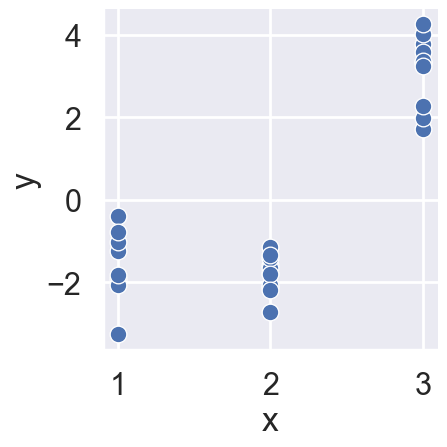

In [46]:
sns.relplot(x='x', y='y', kind='scatter', data=dat)

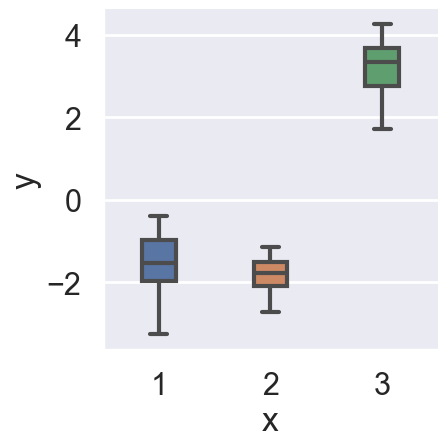

In [47]:
sns.catplot(x='x', y='y', data=dat, kind='box', width=0.3)

이제 변수 `x`를 연속형으로 취급하면서 회귀분석을 해보자.

In [48]:
from statsmodels.formula.api import ols

In [49]:
mod = ols("y ~ x", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     54.28
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           5.06e-08
Time:                        18:32:32   Log-Likelihood:                -53.316
No. Observations:                  30   AIC:                             110.6
Df Residuals:                      28   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2182      0.768     -6.791      0.0

분석결과에 따르면 `x`가 1 증가할 때, y의 평균은 `2`가 증가하는 것으로 나온다.

만약 변수 `x`를 범주형으로 취급한다면(아래 `C(x)`는 **C**ategorical의 **C**인 듯 하다) 분석 결과는 다음과 같다.

In [50]:
mod = ols("y ~ C(x)", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.86e-15
Time:                        18:32:38   Log-Likelihood:                -31.795
No. Observations:                  30   AIC:                             69.59
Df Residuals:                      27   BIC:                             73.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5718      0.260     -6.040      0.0

범주 `1`에서 범주 `2`로 바뀔 때 예상되는 `y` 평균의 감소는 1, 범주 `1`에서 범주 `3`으로 바뀔 때 예상되는 `y`의 평균 증가는 4로 추정되었다. 위의 분석결과와 어떻게 다른지 생각해보자. 만약 `x`가 이미 범주형이라면면 `C(x)`로 쓰지 않아도 된다는 점이 편하다.

In [51]:
#dat = pd.DataFrame({'x2':pd.Categorical(x), 'y':y})
dat['x2'] = pd.Categorical(dat['x'])

In [52]:
mod = ols("y ~ x2", data = dat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.86e-15
Time:                        18:32:40   Log-Likelihood:                -31.795
No. Observations:                  30   AIC:                             69.59
Df Residuals:                      27   BIC:                             73.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5718      0.260     -6.040      0.0

## 범주형 데이터에 대한 전처리 {#sec:preprocess-cat}

###  범주형 데이터 다루기 {#subsec:dealing-cat-toc}



1. 범주 추가하기 : `.add_categories()`
2. 범주 삭제하기 : `.remove_categories()`, `.remove_unused_categories()`
3. 범주 이름 바꾸기 : `.rename_categories()`
4. 범주 순서 바꾸기 : `.reorder_categories()`, `.set_categories()`
5. 범주 합치기 : `from mypack.utils`, `cat_combine()`, `cat_collapse()`, `cat_collapse_cum()`


### 범주 추가 {#subsec:cat-add}

먼저 메쏘드 이름에서 그 기능을 충분히 유추할 수 있는 경우부터 살펴보자. 범주를 추가하거나(`.add_categories()`), 범주를 삭제하고(`.remove_categories()`), 사용되지 않는 범주를 삭제하는(`.remove_unused_categories()`)는 메쏘드를 사용해보자.

이때 `type()`이 `pd.Series`인 경우는 `.cat`을 중간에 추가에 해야 하는 점을 잊지 말자.

In [56]:
#from mypack.utils import ordered
#from mypack.utils import unordered

# x = pd.Categorical(['b', 'a', 'b', 'b'], dtype=CategoricalDtype(['a', 'b', 'c'], False))
x = pd.Categorical(['b', 'a', 'b', 'b'], dtype=unordered(['a', 'b', 'c']))
# y = pd.Series(['b', 'a', 'b', 'b'], dtype=CategoricalDtype(['a', 'b', 'c'], False))
y = pd.Series(['b', 'a', 'b', 'b'], dtype=unordered(['a', 'b', 'c']))
x, y

(['b', 'a', 'b', 'b']
 Categories (3, object): ['a', 'b', 'c'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (3, object): ['a', 'b', 'c'])

In [57]:
x2 = x.add_categories(['d', 'e'])
x2

['b', 'a', 'b', 'b']
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [58]:
#% eval=FALSE
try:
    y.add_categories(['d', 'e'])
except Exception as e:
    print(f"{type(e).__name__}: {e}")
## AttributeError: 'Series' object has no attribute 'add_categories'

AttributeError: 'Series' object has no attribute 'add_categories'


`pd.Categorical()`에도 사용 가능하고 `pd.Series()`에 대해서도 dtype이 범주형이라면 `.cat`을 통해 사용가능하다.

In [59]:
y2 = y.cat.add_categories(['d', 'e'])
y2

0    b
1    a
2    b
3    b
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

### 범주 삭제 {#subsec:cat-remove}

추가를 했으니 다시 삭제해보자.

In [60]:
x2.remove_categories(['d', 'e']), y2.cat.remove_categories(['d', 'e'])

(['b', 'a', 'b', 'b']
 Categories (3, object): ['a', 'b', 'c'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (3, object): ['a', 'b', 'c'])

사용되지 않는(데이터에 존재하지 않는) 범주를 모두 삭제하려면 다음과 같다.

In [61]:
x.remove_unused_categories(), \
y.cat.remove_unused_categories()

(['b', 'a', 'b', 'b']
 Categories (2, object): ['a', 'b'],
 0    b
 1    a
 2    b
 3    b
 dtype: category
 Categories (2, object): ['a', 'b'])

### 범주 이름 바꾸기 {#subsec:cat-rename}

범주 이름을 바꿀 때는 딕셔너리를 사용해서 바꾸기 전 이름과 바뀐 후 이름을 대응해 준다. 'a'를 'Alpha', 'b'를 'Big'으로 바꿔보자.

In [62]:
x.rename_categories({'a':'Alpha', 'b':'Beta'}), \
y.cat.rename_categories({'a':'Alpha', 'b':'Beta'})

(['Beta', 'Alpha', 'Beta', 'Beta']
 Categories (3, object): ['Alpha', 'Beta', 'c'],
 0     Beta
 1    Alpha
 2     Beta
 3     Beta
 dtype: category
 Categories (3, object): ['Alpha', 'Beta', 'c'])

모든 범주 이름을 바꾸려면 다음과 같이 새로운 범주 이름만 리스트로 제공해도 된다.

In [63]:
x.rename_categories(['Alpha', 'Beta', 'Charley']), \
y.cat.rename_categories({'a':'Alpha', 'b':'Beta'})

(['Beta', 'Alpha', 'Beta', 'Beta']
 Categories (3, object): ['Alpha', 'Beta', 'Charley'],
 0     Beta
 1    Alpha
 2     Beta
 3     Beta
 dtype: category
 Categories (3, object): ['Alpha', 'Beta', 'c'])

### 범주 순서 바꾸기 {#subsec:cat-reorder}

범주의 순서를 바꾸기 위해서는 `.reorder_categories()`와 `.set_categories()`를 사용할 수 있다. `.reorder_categories()`의 경우 기존의 범주를 재배치(`reorder`)하여 순서를 결정한다. 기존의 범주가 빠지거나, 새로운 범주가 추가될 수 없다. 반면 `.set_categories()`는 범주를 새롭게 지정하면서 순서까지 바꾼다. 기존의 범주가 빠지거나 새로운 범주가 추가될 수도 있다.

In [64]:
x.reorder_categories(['c', 'b', 'a']) # 원래 순서는 ['a', 'b', 'c']
y.cat.reorder_categories(['c', 'b', 'a'])

0    b
1    a
2    b
3    b
dtype: category
Categories (3, object): ['c', 'b', 'a']

In [65]:
x.set_categories(['c', 'b', 'a']),
y.cat.set_categories(['c', 'b', 'a'])

0    b
1    a
2    b
3    b
dtype: category
Categories (3, object): ['c', 'b', 'a']

이제 범주 `a`를 빼고, `d`를 추가해보자.

In [66]:
x.set_categories(['b', 'c', 'd']), \
y.cat.set_categories(['b', 'c', 'd'])

(['b', NaN, 'b', 'b']
 Categories (3, object): ['b', 'c', 'd'],
 0      b
 1    NaN
 2      b
 3      b
 dtype: category
 Categories (3, object): ['b', 'c', 'd'])

삭제된 범주였던 곳은 `np.nan`이 되었음을 확인하자.

범주형 데이터 중 순위형의 일부를 수정하는 방법은 판다스에서 지원하지 않는 것으로 보인다. (!!! 혹시 제3자 패키지라도 발견하게 되면 알려주세요) 다음에서 저자가 만든 함수를 소개한다(`mypack.utils`에 포함되어 있다).

In [67]:
def reorder_cat_partial(x, orders_new):
    if isinstance(x, pd.Series):
        cat_remains = ~(x.cat.categories.isin(orders_new))
        cat_new = x.cat.categories.values.copy()
        cat_new[~cat_remains] = orders_new
        return x.cat.reorder_categories(cat_new)
    elif isinstance(x, pd.Categorical):
        cat_remains = ~(x.categories.isin(orders_new))
        cat_new = x.categories.values.copy()
        cat_new[~cat_remains] = orders_new
        return x.reorder_categories(cat_new)

x0 = pd.Series(['a', 'b', 3, 4], dtype = 'category')
reorder_cat_partial(x0, ['b',3])

0    a
1    b
2    3
3    4
dtype: category
Categories (4, object): ['b', 4, 'a', 3]

In [68]:
x  = pd.Series(list('abbdeedfabcdef'),
               dtype = 'category').cat.as_ordered()
reorder_cat_partial(x, ['f', 'b', 'd'])

0     a
1     b
2     b
3     d
4     e
5     e
6     d
7     f
8     a
9     b
10    c
11    d
12    e
13    f
dtype: category
Categories (6, object): ['a' < 'f' < 'c' < 'b' < 'e' < 'd']

### 범주 합치기 {#subsec:cat-combine}

범주를 합치는 방법은 판다스에서 지원하지 않는 것으로 보인다. (!!! 혹시 제3자 패키지라도 발견하게 되면 알려주세요) 다음에서 저자가 만든 함수를 소개한다.

In [75]:
#from mypack.utils import cat_combine, cat_collapse, cat_collapse_cum

def cat_combine(x, lst_a, b):
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if b not in x.categories:
            x2 = pd.Series(x.add_categories(b), index = x.add_categories(b),
                          dtype = "category")
        else:
            x2 = pd.Series(x, index = x,
                          dtype = "category")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if b not in x.cat.categories:
            x2 = x.cat.add_categories(b)
            x2.index = x2
        else:
            x2 = x
            x2.index = x2
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
        
    #print(x2)
    #print(type(x2))
    #print('*'*10)
    for cat in lst_a:
        x2.loc[cat] = b
    
    #print(x2.index)
    #print(x2)
    #print(type(x2))
        
    return typ(x2.cat.remove_categories(list(set(lst_a)-set([b]))))
        

def cat_collapse_cum(x, min_freq = None, min_pct = None, others = 'others'):
    if min_freq is not None and min_pct is not None:
        raise ValueError("Only one of min_freq or min_pct should be set")
    if min_freq is None and min_pct is None:
        min_pct = 0.01
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if others in x.categories:
            raise ValueError(f"others({others}) already in the categories")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if others in x.cat.categories:
            raise ValueError(f"others({others}) already in the categories")
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
    
    cats = x.value_counts()
    cats_sum = cats.sum()
    cats_cumsum = cats.sort_values().cumsum()
    if min_freq is not None:
        cats_below = cats_cumsum < min_freq
    else:
        cats_below = cats_cumsum/cats_sum < min_pct
    cats_remain = set(cats.index) - set(cats[cats_below].index)
    if isinstance(x, pd.Categorical):
        x2 = x.set_categories(list(cats_remain)+[others])
    else:
        x2 = x.cat.set_categories(list(cats_remain)+[others])
    # x3 = x2.value_counts(dropna = False)
    x2[x2.isna()] = others
    if isinstance(x, pd.Categorical):
        x2 = x2.remove_unused_categories()
    else:
        x2 = x2.cat.remove_unused_categories()
    
    return typ(x2)

def cat_collapse(x, min_freq = None, min_pct = None, others = 'others'):
    if min_freq is not None and min_pct is not None:
        raise ValueError("Only one of min_freq or min_pct should be set")
    if min_freq is None and min_pct is None:
        min_pct = 0.01
    typ = type(x)
    if isinstance(x, pd.Categorical):
        if others in x.categories:
            raise ValueError(f"others({others}) already in the categories")
    elif isinstance(x, pd.Series) and hasattr(x, "cat"):
        if others in x.cat.categories:
            raise ValueError(f"others({others}) already in the categories")
    else:
        raise ValueError("x should be either pd.Categorical or pd.Series([], dtype='category')")
    
    cats = x.value_counts()
    if min_freq is not None:
        cats_below = cats < min_freq
    else:
        cats_below = cats/cats.sum() < min_pct
    cats_remain = set(cats.index) - set(cats[cats_below].index)
    if isinstance(x, pd.Categorical):
        x2 = x.set_categories(list(cats_remain)+[others])
    else:
        x2 = x.cat.set_categories(list(cats_remain)+[others])
    # x3 = x2.value_counts(dropna = False)
    x2[x2.isna()] = others
    if isinstance(x, pd.Categorical):
        x2 = x2.remove_unused_categories()
    else:
        x2 = x2.cat.remove_unused_categories()
    
    return typ(x2)

`cat_combine()` 함수는 범주형 데이터에서 2개 이상의 범주를 하나로 합친다. `pd.Categorical()`과 dtype이 `category`인 판다스 시리즈 모두 사용 가능하다.

In [76]:
import numpy as np
import pandas as pd

In [77]:
x0 = np.random.choice(list('abcdefg'), size=100, p=[0.6, 0.18, 0.07, 0.05, 0.05, 0.03, 0.02])

x = pd.Categorical(x0)
y = pd.Series(x0, dtype='category')

y.value_counts()

a    60
b    23
c     8
e     4
d     2
g     2
f     1
Name: count, dtype: int64

In [78]:
y

0     a
1     a
2     b
3     a
4     a
     ..
95    a
96    a
97    a
98    a
99    a
Length: 100, dtype: category
Categories (7, object): ['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [79]:
cat_combine(x, ['a', 'b'], 'c')

['c', 'c', 'c', 'c', 'c', ..., 'c', 'c', 'c', 'c', 'c']
Length: 100
Categories (5, object): ['c', 'd', 'e', 'f', 'g']

In [80]:
cat_combine(y, ['a', 'b'], 'c')

0     c
1     c
2     c
3     c
4     c
     ..
95    c
96    c
97    c
98    c
99    c
Length: 100, dtype: category
Categories (5, object): ['c', 'd', 'e', 'f', 'g']

`pd.Series`의 메소드 `.replace()`를 활용할 수도 있다

In [81]:
pd.Series(x).replace(['a', 'b'], 'c')

0     c
1     c
2     c
3     c
4     c
     ..
95    c
96    c
97    c
98    c
99    c
Length: 100, dtype: category
Categories (5, object): ['c', 'd', 'e', 'f', 'g']

`cat_collapse(x, min_freq)`와 `cat_collapse(x, min_pct)`은 모두 빈도 또는 비율이 작은 범주를 하나(예. `others`)로 묶어준다.

In [82]:
cat_collapse

<function __main__.cat_collapse(x, min_freq=None, min_pct=None, others='others')>

In [83]:
res1 = cat_collapse(x, min_pct=0.1, others='insignificant')
# 0.1보다 작은 비율의 범주는 모두 'insignificant'로 묶는다.
res1

['a', 'a', 'b', 'a', 'a', ..., 'a', 'a', 'a', 'a', 'a']
Length: 100
Categories (3, object): ['b', 'a', 'insignificant']

In [84]:
res2 = cat_collapse_cum(x, min_pct=0.1, others='<0.1')
# 합쳐서 0.1보다 작은 비율의 범주는 모두 '<0.1'로 묶는다.
res2

['a', 'a', 'b', 'a', 'a', ..., 'a', 'a', 'a', 'a', 'a']
Length: 100
Categories (4, object): ['b', 'a', 'c', '<0.1']

둘의 차이는 다음의 결과에서 확인할 수 있다. 아쉽게도 위의 함수들은 순위형 자료형을 적절하게 처리하지 못한다. 순위형도 명목형으로 취급한다.

In [85]:
x.value_counts()

a    60
b    23
c     8
d     2
e     4
f     1
g     2
Name: count, dtype: int64

In [86]:
res1.value_counts()/len(res1)

b                0.23
a                0.60
insignificant    0.17
Name: count, dtype: float64

In [87]:
res2.value_counts()/len(res1)

b       0.23
a       0.60
c       0.08
<0.1    0.09
Name: count, dtype: float64

## 고급

### 판다스에서 범주형 데이터 

파이썬의 **내장 클래스** 또는 **표준 모듈**에는 범주형 데이터를 위한 클래스가 없다. **넘파이** 배열에서도 범주형을 위한 dtype(데이터타입)을 지원하지 않는다. 하지만 데이터 분석에서 범주형 자료는 자주 쓰인다. 범주형 데이터를 위해 넘파이 배열 또는 판다스 시리즈의 `object` dtype(데이터타입)을 쓰기도 하지만, 몇 가지 단점이 있다. 데이터에 존재하지 않는 범주 정보를 저장할 수 없고, 순위형의 순위 정보도 저장할 수 없다. 그리고 남자, 여자처럼 소수의 범주를 가진 변수를 저장하기 위해서 `object` dtype은 값 하나 당 보통 4바이트가 필요하지만 남자, 여자를 정수 0, 1로 저장하면 1바이트로도 충분하다. 따라서 연산 속도가 느릴 것이라고 예상할 수 있다.

판다스에서는 범주형 데이터를 위해 `pd.Categorical()`과 `pd.Series([], dtype='category')`를 지원한다.

다음은 동`East`, 서`West`, 남`South`, 북`North`을 범주로 갖는 자료를 `pd.Categorical()`과 `pd.Series()`를 사용하여 객체로 만든다.

In [88]:
zc = pd.Categorical(['North', 'East', 'West', 'East', 'West'])
zc

['North', 'East', 'West', 'East', 'West']
Categories (3, object): ['East', 'North', 'West']

In [89]:
zs = pd.Series(['North', 'East', 'West', 'East', 'West'],
               dtype='category')
zs

0    North
1     East
2     West
3     East
4     West
dtype: category
Categories (3, object): ['East', 'North', 'West']

일단 `pd.Categorical()`과 `pd.Series([], dtype='category')`의 차이에 알아보자.

`type()`과 `.dtype`으로 둘을 비교해보면 다음과 같다.

In [90]:
x = pd.Categorical([])
type(x), x.dtype

(pandas.core.arrays.categorical.Categorical,
 CategoricalDtype(categories=[], ordered=False))

In [91]:
y = pd.Series([], dtype='category')
type(y), y.dtype

(pandas.core.series.Series, CategoricalDtype(categories=[], ordered=False))

이 둘의 관계는 마치 `np.array()`와 `pd.Series()`의 관계와 비슷하다. 먼저 `.dtype`은 `CategoricalDtype()`으로 동일하다(내용물은 같다고 볼 수 있다).

넘파이 배열은 범주형 자료를 지원하지 않기 때문에 판다스에서 새롭게 범주형을 지원하는 새로운 클래스를 만들었다.
위의 결과를 보면 클래스는 `pandas.core.arrays.categorical.Categorical`이다. 중간의 `arrays`에서 넘파이 배열(`array`)와의 유사성을 유추해 볼 수 있다. `pd.Categorical()`과 `pd.Series()`의 차이는 배열은 인덱스를 지원하지 않고, `pd.Series()`는 인덱스가 있다는 점이다.

`pd.Categorical()`에는 범주형 데이터를 다루는 여러 가지 메소드가 존재한다. 예를 들어 새로운 범주를 추가할 때에는 `.add_categories()` 메소드를 사용한다. 이런 메소드는 `pd.Series()`에서는 `.cat` accesor로 접근할 수 있다.  예를 들어, `x=pd.Categorical()`, `y=pd.Series([], dtype='category')`일 때, `x.add_categories([])`, `y.cat.add_cateogries([])`으로 쓴다.

마지막으로 `pd.Categorical`과 `pd.Series`는 다음과 같이 서로 변환할 수 있다. 
* `pd.Series()` : `pd.Categorical`을 `pd.Series`로 변환
* `.values` : `pd.Series`를 `pd.Categorical`로 변환

In [92]:
x = pd.Categorical(['North', 'East', 'West', 'East', 'West'])

In [93]:
y = pd.Series(x.copy())
# from copy import deepcopy
# y = pd.Series(deepcopy(x))
y.head()

0    North
1     East
2     West
3     East
4     West
dtype: category
Categories (3, object): ['East', 'North', 'West']

In [94]:
# deepcopy(y.values)
y.values.copy()

['North', 'East', 'West', 'East', 'West']
Categories (3, object): ['East', 'North', 'West']

만약 위에서처럼 `.copy()`를 쓰지 않으면 다음과 같이 서로 값을 공유하기 때문에 주의할 필요가 있다. 왠만한 경우는 `.copy()`(또는 `deepcopy.copy()`)를 쓰면 혼란의 여지가 별로 없다.

In [95]:
y[0] = 'East'

In [96]:
x

['North', 'East', 'West', 'East', 'West']
Categories (3, object): ['East', 'North', 'West']

### `pd.Categorical()`

`pd.Categorical` 객체를 생성하는 방법은 다음과 같다.[^rpdcategorical]

[^rpdcategorical]: 이는 R에서 `x <- factor(c('Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'))`를 한 것과 비슷하다.

In [97]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'])
x

['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta']
Categories (3, object): ['Alpha', 'Beta', 'Charley']

위에서 생성한 `x`와 동일한 내용을 담고 있는 넘파이 배열 `y`를 다음과 같이 생성했다.

In [98]:
y = np.array(['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta'])
type(y), y.dtype

(numpy.ndarray, dtype('<U7'))

문자열을 담고 있는 배열은 `dtype='O'` 또는 `dtype='U'`로 생성할 수 있다. `pd.array([], dtype='O')` 또는 `pd.array([], dtype='U')`과 같은 문자열 넘파이 배열과 `pd.Categorical()`의 차이는 데이터를 저장하는 방식에 있다. `pd.Categorical()`은 먼저 범주를 확인한다. `y`를 보면 총 자료는 5개이지만, `Alpha`와 `Beta`가 반복되고 있다. 그래서 총 범주는 3개로 리스트로 나타내면 `['Alpha', 'Beta', 'Charley']`이다. 그리고 이들에 코드를 배정한다. `Alpha`는 0, `Beta`는 1, `Charley`는 2로 코드를 배정한 후, 실제 데이터는 배정된 코드를 사용하여 표현한다. `['Alpha', 'Beta', 'Alpha', 'Charley', 'Beta']`는 코드로 나타내면 `[0,1,0,2,1]`이 된다.

`pd.Categorical()`은 이렇게 데이터는 범주(category)와 코드로 분리해 저장하게 된다. 범주와 코드는 `.categories`와 `.codes`로 확인할 수 있다.

In [99]:
x.categories, x.codes 

(Index(['Alpha', 'Beta', 'Charley'], dtype='object'),
 array([0, 1, 0, 2, 1], dtype=int8))

만약 결측값(`None` 또는 `np.nan`)이 있다면 코드 `-1`로 저장된다.

In [100]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', np.nan, None])
x.codes, x

(array([ 0,  1,  0, -1, -1], dtype=int8),
 ['Alpha', 'Beta', 'Alpha', NaN, NaN]
 Categories (2, object): ['Alpha', 'Beta'])

위에서 자료에 `'Charley'`가 포함되어 있지 않기 때문에 결과에 `Categories`를 보면 `'Alpha'`와 `'Beta'`만 있다. 만약 범주를 이미 알고 있다면 `categories=`를 통해 알려줄 수 있다.

In [101]:
x = pd.Categorical(['Alpha', 'Beta', 'Alpha', np.nan, None],
                  categories=['Alpha', 'Beta', 'Charley'])
x

['Alpha', 'Beta', 'Alpha', NaN, NaN]
Categories (3, object): ['Alpha', 'Beta', 'Charley']

### 범주형 데이터를 다룰 때 유의할 점

판다스 시리즈를 조작할 때 `dtype`이 범주형이라면 좀더 유의해야 한다. 다음의 예를 보자.

In [102]:
x = pd.Series([1,2,3,2])
x[4] = 5 # dtype('int64')에서는 추가가 어렵지 않다
x

0    1
1    2
2    3
3    2
4    5
dtype: int64

데이터 타입이 정수라면 `x[4]=5`와 같이 사용해서 `x`에 4-번째 원소를 추가할 수 있다. 하지만 범주형이라면?

In [103]:
s = pd.Series(['a', 'b', 'b', 'a'], dtype='category')
s[4] = 'b' # 하지만 dtype이 object로 바뀜
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

정수형 데이터 타입과 마찬가지로 성공적으로 원소를 추가한 듯 보이지만, `dtype`이 `object`으로 바뀌었다. 원한다면 `s.astype('category')`로 다시 범주형으로 돌려 놓을 수 있지만, 왜 그럴까?

In [104]:
s = s.astype('category')
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

추가되는 원소의 타입을 확인해 볼 필요가 있다.

In [105]:
type('b')

str

추가되는 원소의 타입과 시리즈의 데이터 타입이 다르다. 위에서 dtype이 `int64`인 경우에도 비슷한 경우가 있다.

In [106]:
x[5] = 1.2
x

0    1.0
1    2.0
2    3.0
3    2.0
4    5.0
5    1.2
dtype: float64

기존의 원소는 정수형이고, 새롭게 추가되는 원소가 `float64`일 때, 결과는 dtype이 `float64`로 변경되었다.

그렇다면 이제 dtype을 보존하면서 새로운 원소를 추가하려면 어떻게 해야 할까? 복잡해보이지만 `pd.concat()`을 활용하면 다음과 같다.

In [107]:
pd.concat([s, pd.Series(['b'], dtype=unordered(['a', 'b']))])

0    a
1    b
2    b
3    a
4    b
0    b
dtype: category
Categories (2, object): ['a', 'b']

이때 추가하는 시리즈의 dtype에 유의해야 한다. 동일한 dtype끼리 합칠 때에는 dtype에 변화가 없다. 하지만 그렇지 않다면?

In [108]:
pd.concat([s, pd.Series(['b'], dtype=unordered(['b']))])

0    a
1    b
2    b
3    a
4    b
0    b
dtype: object

범주가 많건 적던 dtype이 다르다면 dtype은 `object`로 변경된다. 물론 `.astype('category')`로 다시 범주형으로 변환하거나 다음과 같이 `union_categorical()` 함수를 사용할 수 있다(순위형인 경우, 범주는 같은데 순위가 다르다면 에러가 발생한다. 만약 순위를 무시하고 싶다면 `ignore_order=True`로 설정한다.)

In [109]:
from pandas.api.types import union_categoricals
union_categoricals([s, pd.Series(['b'], dtype=unordered(['b']))])
s

0    a
1    b
2    b
3    a
4    b
dtype: category
Categories (2, object): ['a', 'b']

한 가지 아쉬운 점은 판다스 시리즈의 경우 인덱스가 보존되지 않는다는 점이다. 인덱스를 보존하고자 한다면 다음과 같이 사용할 수 있다.

In [110]:
s2 = pd.Series(['b'], dtype=unordered(['b']))
pd.Series(union_categoricals([s, s2]),
          index = s.index.tolist() + s2.index.tolist())

0    a
1    b
2    b
3    a
4    b
0    b
dtype: category
Categories (2, object): ['a', 'b']

### 범주형 시리즈의 dtype

In [111]:
x.dtype

dtype('float64')

범주형의 `dtype`은 다른 `dtype`(예. `dtype('int8')`, `dtype('float')` 등. 아래 참조.)과 달리 상당히 길다.

In [112]:
y = np.array([1,2,3])
y.dtype

dtype('int64')

두 범주형 데이터의 `dtype`이 같으려면, 범주가 같아야 하고, 그리고 순위형이라면 순위도 같아야 한다. 다음을 보자.

In [114]:
#from mypack.utils import ordered, unordered

In [115]:
x1 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['a', 'b', 'c']))
x2 = pd.Series(['c', 'b', 'b', 'a', 'c', 'a'], dtype=ordered(['a', 'b', 'c']))
x3 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['c', 'b', 'a']))
x4 = pd.Series(['c', 'b', 'b', 'a'], dtype=ordered(['a', 'b']))
u1 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['a', 'b', 'c']))
u2 = pd.Series(['c', 'b', 'b', 'a', 'c', 'a'], dtype=unordered(['a', 'b', 'c']))
u3 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['c', 'b', 'a']))
u4 = pd.Series(['c', 'b', 'b', 'a'], dtype=unordered(['a', 'b']))
s1 = pd.Series(['c', 'b', 'b', 'a'])

In [116]:
x1.dtype, x2.dtype, x3.dtype, x4.dtype

(CategoricalDtype(categories=['a', 'b', 'c'], ordered=True),
 CategoricalDtype(categories=['a', 'b', 'c'], ordered=True),
 CategoricalDtype(categories=['c', 'b', 'a'], ordered=True),
 CategoricalDtype(categories=['a', 'b'], ordered=True))

In [117]:
u1.dtype, u2.dtype, u3.dtype, u4.dtype

(CategoricalDtype(categories=['a', 'b', 'c'], ordered=False),
 CategoricalDtype(categories=['a', 'b', 'c'], ordered=False),
 CategoricalDtype(categories=['c', 'b', 'a'], ordered=False),
 CategoricalDtype(categories=['a', 'b'], ordered=False))

In [118]:
x1.dtype == x2.dtype, x1.dtype == x3.dtype, x1.dtype == x4.dtype, \
x2.dtype == x3.dtype, x2.dtype == x4.dtype, x3.dtype == x4.dtype

(True, False, False, False, False, False)

순위형 데이터타입(`dtype`)의 경우는 앞에서 얘기했듯이 **범주와 순위**가 모두 같아야 데이터 타입이 같다.

In [119]:
x1.dtype == ordered(['a', 'b', 'c'])

True

다음 결과를 보면 명목형의 경우 **범주의 순서는 상관없다**는 것을 확인할 수 있다.

In [120]:
u1.dtype == u2.dtype, u1.dtype == u3.dtype, u1.dtype == x4.dtype, \
u2.dtype == u3.dtype, u2.dtype == u4.dtype, u3.dtype == x4.dtype

(True, True, False, True, False, False)

예외적으로 모든 범주형 dtype은 "category"와 `==`이다.

In [121]:
u1.dtype == "category", u2.dtype == "category", u3.dtype == "category", u4.dtype == "category"

(True, True, True, True)

In [122]:
u1.dtype == 'cat' # 'category'로 적어줄 경우만 True로 출력된다.

False

다음과 같은 방식도 유용하다.

In [123]:
isinstance(x1.dtype, CategoricalDtype), isinstance(x2.dtype, CategoricalDtype), \
isinstance(x3.dtype, CategoricalDtype), isinstance(x4.dtype, CategoricalDtype)

(True, True, True, True)

In [124]:
isinstance(u1.dtype, CategoricalDtype), isinstance(u2.dtype, CategoricalDtype), \
isinstance(u3.dtype, CategoricalDtype), isinstance(u4.dtype, CategoricalDtype)

(True, True, True, True)

아래에서 보듯이 `x1`은 `pd.Series`이고, `x1.values`는 `pd.Categorical`이다

In [125]:
isinstance(x1.values, pd.Categorical), isinstance(s1.values, pd.Categorical)

(True, False)

In [126]:
isinstance(x1, pd.Series), isinstance(s1, pd.Series)

(True, True)